# 题目一

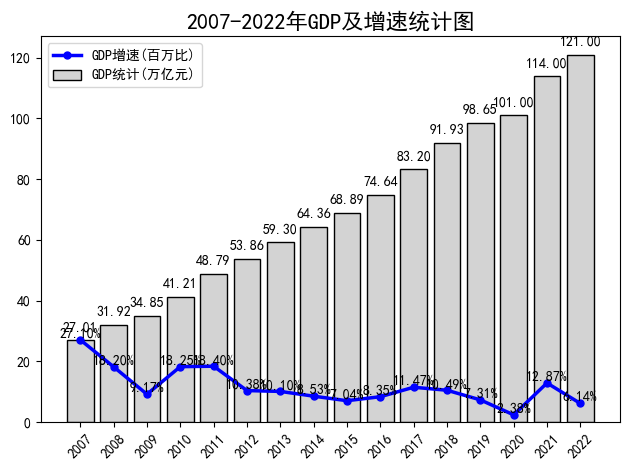

In [1]:
import matplotlib.pyplot as plt

# 解决中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 年份和对应的GDP数据
years = list(range(2007, 2023))
gdp = [27.0092, 31.9244, 34.8517, 41.2119, 48.794, 53.858, 59.2963, 64.3563, 
       68.8858, 74.6395, 83.2035, 91.9281, 98.6515, 101, 114, 121]
    
# 计算GDP增速
gdp_growth = [(gdp[i] - gdp[i-1]) / gdp[i-1] * 100 if i > 0 else 27.1 for i in range(len(gdp))]

# 绘制图形
width = 0.8  # the width of the bars
# plt.figure(figsize=(10, 6))

plt.title('2007-2022年GDP及增速统计图', fontsize=16, color='black')

# 绘制柱状图
bars = plt.bar(years, gdp, width, color='lightgrey', label='GDP统计(万亿元)', edgecolor='black')
plt.bar_label(bars, labels=[f'{val:.2f}' for val in gdp], label_type='edge', padding=5)

# 绘制折线图
plots = plt.plot(years, gdp_growth, color='blue', linewidth=2.5, marker='o', markersize=5, label='GDP增速(百万比)')

for i in range(len(years)):
    plt.text(years[i], gdp_growth[i], '%.2f%%' % gdp_growth[i], ha='center', va='bottom')

plt.xticks(years, rotation=45)
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()

# 

# 实验二

训练集样本数: 60000
训练集形状: (28, 28)
测试集样本数: 10000
测试集形状: (28, 28)
0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankle boot


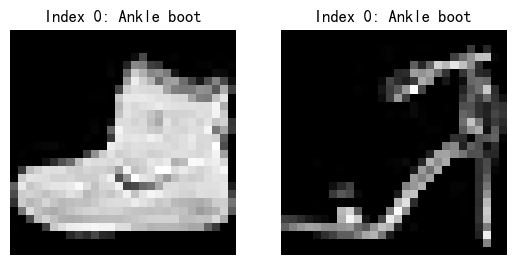

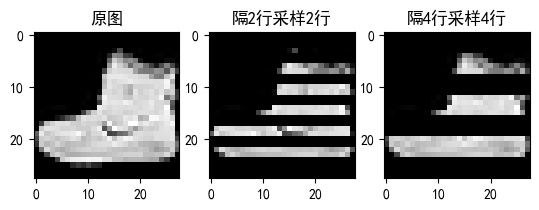

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from keras.datasets import fashion_mnist

# 加载Fashion MNIST数据集
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

# 解决中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 定义类别标签
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# 查看训练集和测试集的样本数和形状
print("训练集样本数:", x_train.shape[0])
print("训练集形状:", x_train.shape[1:])

print("测试集样本数:", x_test.shape[0])
print("测试集形状:", x_test.shape[1:])

# 打印出数据集中的10个类别标签
for i, label_name in enumerate(class_labels):
    print(i, ":", label_name)


# 提取训练集中索引值为0和8的图片
index_0, labels_0= x_train[0], class_labels[y_train[0]]
index_8, labels_8= x_train[8], class_labels[y_train[8]]

# 显示索引值为0的图片
plt.subplot(121)
plt.imshow(index_0, cmap='gray')
plt.title(f"Index 0: {labels_0}")
plt.axis('off')

# 显示索引值为8的图片
plt.subplot(122)
plt.imshow(index_8, cmap='gray')
plt.title(f"Index 0: {labels_0}")
plt.axis('off')
plt.show()


# 对训练集索引值为0的图片进行局部采样
image_0 = x_train[0]

# 隔2行采样8行
sampled_2 = np.zeros_like(image_0)
for i in range(2, image_0.shape[0], 4):  # 隔2行采样，因此步长为4
    sampled_2[i:i + 2, :] = image_0[i:i + 2, :]

# 隔4行采样4行
sampled_4 = np.zeros_like(image_0)
for i in range(4, image_0.shape[0], 8):  # 隔4行采样，因此步长为8
    sampled_4[i:i + 4, :] = image_0[i:i + 4, :]

# 显示原图
plt.subplot(131)
plt.imshow(image_0, cmap='gray')
plt.title('原图')

# 显示隔2行采样2行的图像
plt.subplot(132)
plt.imshow(sampled_2, cmap='gray')
plt.title('隔2行采样2行')

# 显示隔4行采样4行的图像
plt.subplot(133)
plt.imshow(sampled_4, cmap='gray')
plt.title('隔4行采样4行')

plt.show()


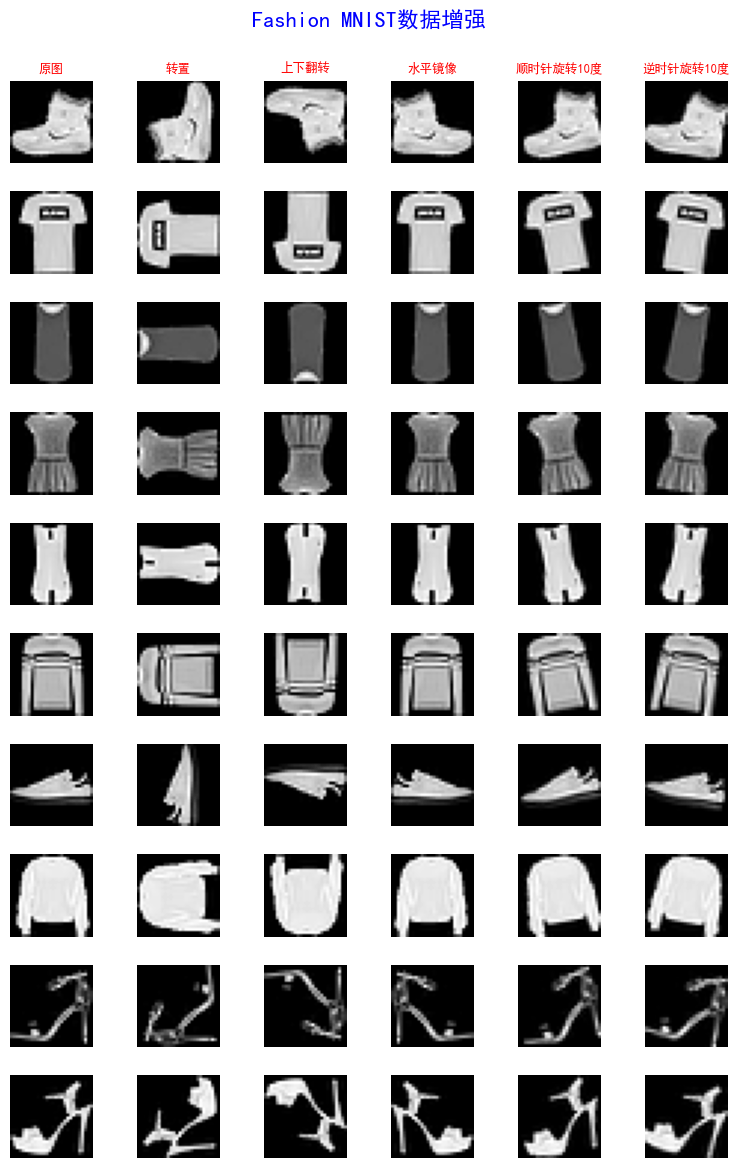

In [3]:
# 选取训练集中前10张图片
train_x_10 = x_train[0:10]
train_x_aug1 = []
for img in train_x_10:
    # 原图
    train_x_aug1.append(img)
    # 转置
    train_x_aug1.append(np.transpose(img, (1, 0)))
    # 上下翻转
    train_x_aug1.append(np.flipud(img))
    # 水平镜像
    train_x_aug1.append(np.fliplr(img))
    # 顺时针旋转10度
    train_x_aug1.append(rotate(img, 10, reshape=False))
    # 逆时针旋转10度
    train_x_aug1.append(rotate(img, -10, reshape=False))

# 显示图片
plt.figure(figsize=(8, 12))
plt.suptitle('Fashion MNIST数据增强', fontsize=16, color='blue')

op_title = ['原图', '转置', '上下翻转', '水平镜像', '顺时针旋转10度', '逆时针旋转10度']
for i in range(10):
    for j in range(6):
        plt.subplot(10, 6, i * 6 + j + 1)
        plt.imshow(train_x_aug1[i * 6 + j], cmap='gray')
        plt.axis('off')
        if(i == 0):
            plt.title(op_title[j], fontsize=9, color='red')

plt.tight_layout(pad=2)  # 调整子图参数，使之填充整个图像区域
plt.show()


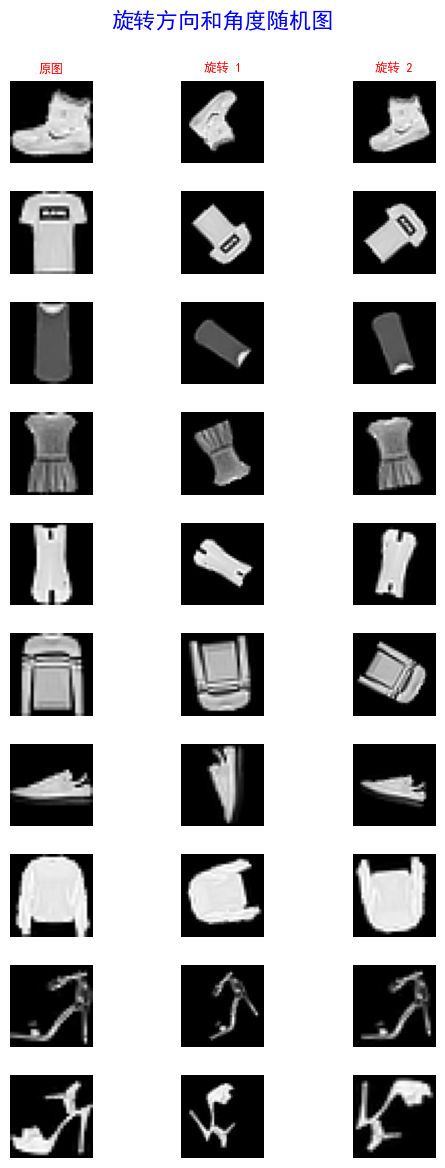

In [104]:
# 选取前10张图片
train_x_10 = x_train[:10]
train_x_aug2 = []

# 对每张图片进行2次随机旋转
for img in train_x_10:
    train_x_aug2.append(img)  # 添加原图
    for i in range(2):
        angle = np.random.uniform(-360, 360)  # 生成-360到360度之间的随机角度
        rotated_img = rotate(img, angle)
        train_x_aug2.append(rotated_img)  # 添加旋转后的图片

op_title = ['原图', '旋转 1', '旋转 2']
# 展示结果
plt.figure(figsize=(6, 12))
for i in range(10):
    for j in range(3):
        plt.subplot(10, 3, i*3 + j + 1)
        plt.imshow(train_x_aug2[i*3 + j], cmap='gray')
        plt.axis('off')
        if(i == 0):
            plt.title(op_title[j], fontsize=9, color='red')

plt.suptitle('旋转方向和角度随机图', fontsize=16, color='blue')

plt.tight_layout(pad=2)
plt.show()

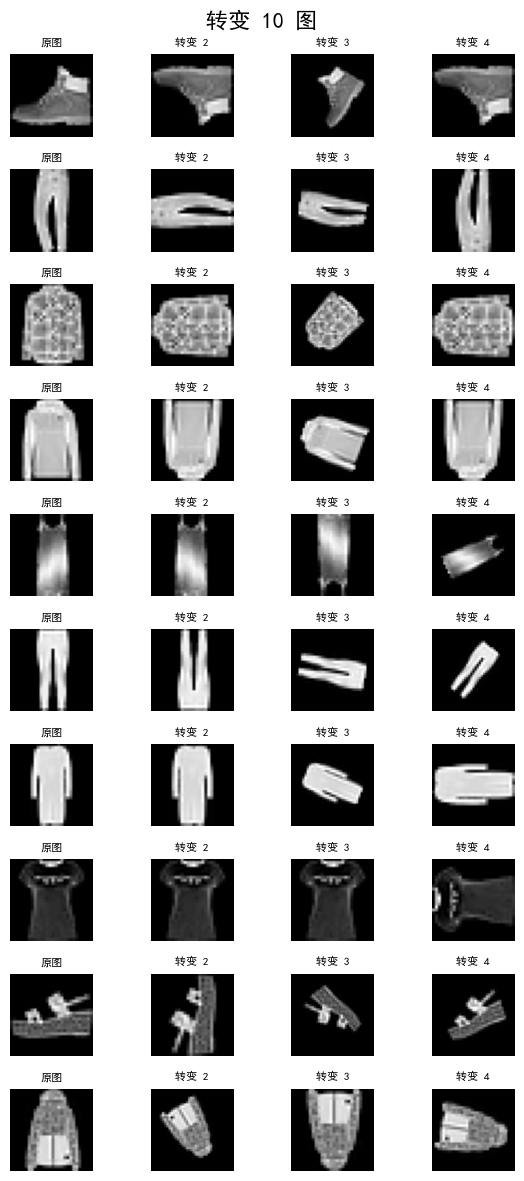

In [106]:
train_x_100 = x_train[:100]
train_x_aug3 = []

# 对每张图片进行3种随机变换
for img in train_x_100:
    train_x_aug3.append(img)  # 添加原图
    for _ in range(3):
        # 随机选择一种变换
        transform_type = np.random.choice(['transpose', 'flipud', 'fliplr', 'rotate'])
        if transform_type == 'transpose':
            img_transformed = np.transpose(img, (1, 0))
        elif transform_type == 'flipud':
            img_transformed = np.flipud(img)
        elif transform_type == 'fliplr':
            img_transformed = np.fliplr(img)
        elif transform_type == 'rotate':
            angle = np.random.uniform(-360, 360)
            img_transformed = rotate(img, angle)
        train_x_aug3.append(img_transformed)  # 添加变换后的图片

# 随机选择10张原图并展示其变换结果

plt.figure(figsize=(6, 12))
for i in range(10):
    rd = np.random.randint(0, 99)
    # 展示三种变换后的图片
    for j in range(4):
        plt.subplot(10, 4, i * 4 + j + 1)
        plt.imshow(train_x_aug3[rd * 4 + j], cmap='gray')
        plt.axis('off')
        if(j == 0):
            plt.title('原图', fontsize=8)
        else:
            plt.title(f'转变 {j + 1}', fontsize=8)

plt.suptitle('转变 10 图', fontsize=16)
plt.tight_layout()
plt.show()

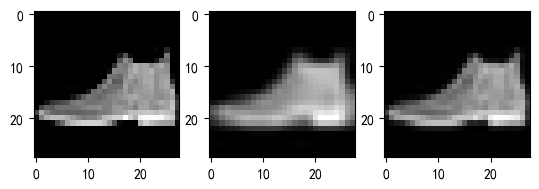

In [110]:
from PIL import Image

def resize_image(image, scale):
    # 获取图像的宽度和高度
    width, height = image.size
    
    # 计算缩放后的新尺寸
    new_width = int(width * scale)
    new_height = int(height * scale)
    
    # 缩放图像
    resized_image = image.resize((new_width, new_height), Image.LANCZOS)
    
    return resized_image

# 打开图像
image = Image.fromarray(x_test[0])
# 缩小10%
scaled_down_image = resize_image(image, 0.5)
# 放大10%
scaled_up_image = resize_image(image, 1.5)

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.imshow(scaled_down_image.resize((28, 28)), cmap='gray')
plt.subplot(133)
plt.imshow(scaled_up_image.resize((28, 28)), cmap='gray')

plt.show()


# 实验三

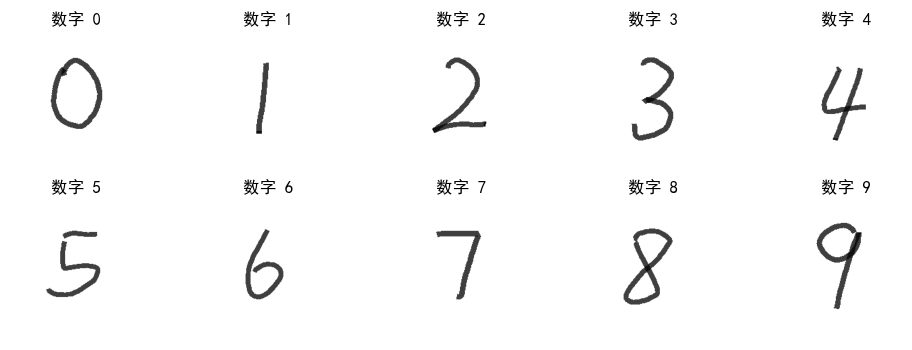

(11, 28, 28)
(28, 28)
(28, 28)


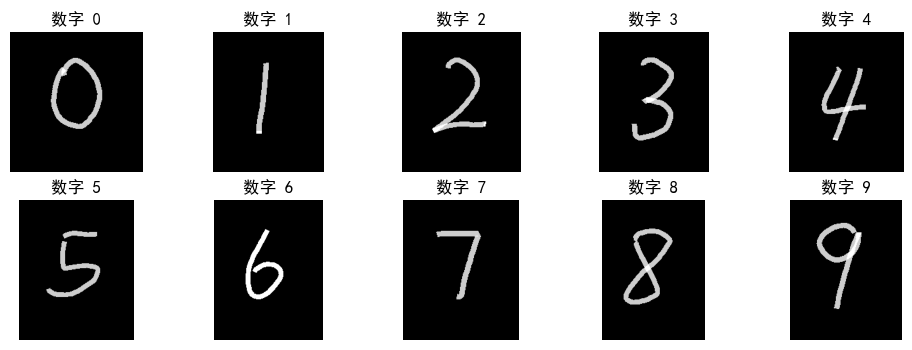

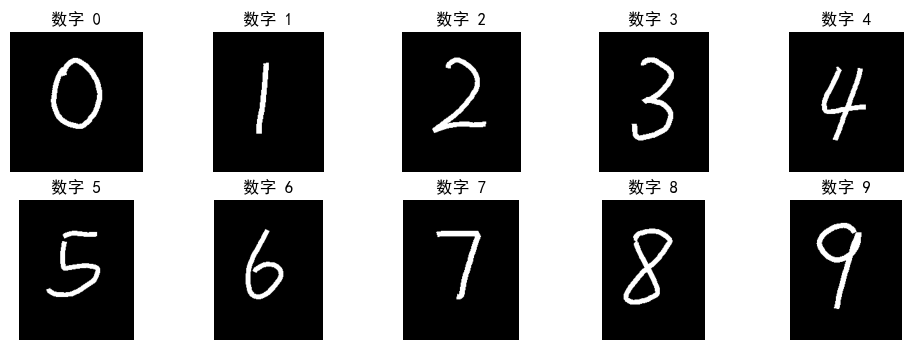

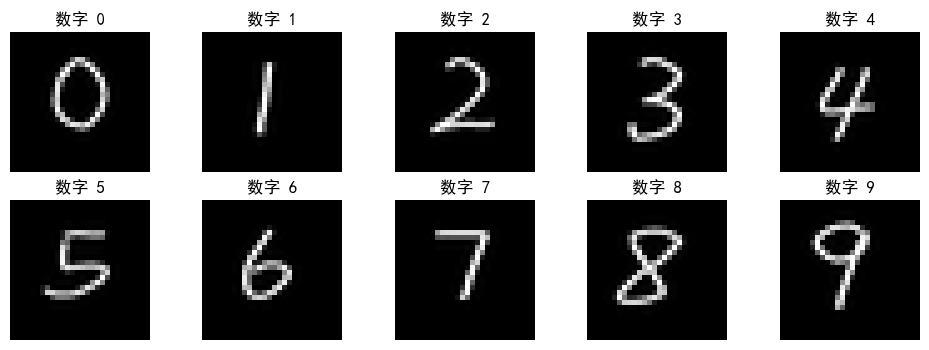

加载的文件：


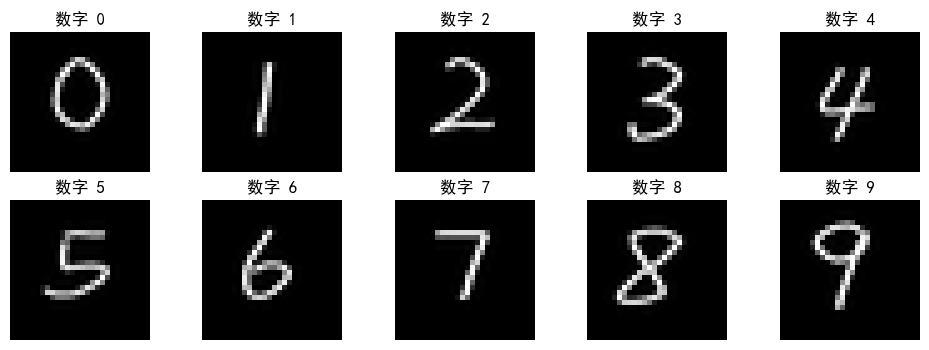

In [20]:
from PIL import Image, ImageOps
import numpy as np
import os
import matplotlib.pyplot as plt

# 图片所在的目录
hand_image_path = "hand_write/"

image_files = []
# 遍历目录中的所有文件
for filename in os.listdir(hand_image_path):
    if filename.endswith(".png"):
        # 构建文件的完整路径
        file_path = os.path.join(hand_image_path, filename)
        # 读取PNG文件
        image = Image.open(file_path)
        image_files.append(image)

def img_show(image_files):

    plt.figure(figsize=(12, 4))

    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(image_files[i], cmap='gray')
        plt.axis('off')
        plt.title(f'数字 {i}')
    plt.show()

img_show(image_files)

inverted_image_z = []
binary_images = []
resized_images = []
# 打印图片文件列表
for image in image_files:

    if image.mode != 'L':
        image = image.convert('L')

    # 反色和二值化处理
    # inverted_image = Image.eval(image, lambda x: 255 - x)
    inverted_image = ImageOps.invert(image)

    # 二值化处理
    threshold = 128
    binary_image = inverted_image.point(lambda x: 255 if x > threshold else 0)

    #缩放图片到28x28像素
    resized_image = binary_image.resize((28, 28), Image.LANCZOS)

    # 添加
    inverted_image_z.append(inverted_image)
    binary_images.append(binary_image)
    resized_images.append(resized_image)

image_arrays = []
# 转numpy数组
for img in resized_images:
    image_arrays.append(np.array(img))

# 将图像数组列表堆叠成一个三维数组
stacked_images = np.stack(image_arrays, axis=0)

print(stacked_images.shape)
print(np.array(resized_images[0]).shape)
print(np.array(image_arrays[0]).shape)
# 保存 文件
np.save("image_data.npy", stacked_images)
# 加载 文件
loaded_image_data = np.load("image_data.npy")
image_data_list = [loaded_image_data[i, :, :] for i in range(10)]

img_show(inverted_image_z)

img_show(binary_images)

img_show(resized_images)

print("加载的文件：")
img_show(image_data_list)


    

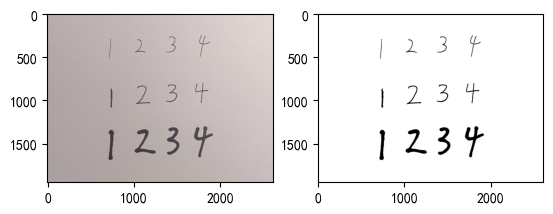

In [150]:
from PIL import Image, ImageEnhance, ImageFilter

# 加载图片
image = Image.open("digit.jpg")  # 替换为你的数字图片路径
orgen = image

image = image.point(lambda x: 255 if x > threshold else 0)
# 1. 调整图像亮度和对比度
enhancer = ImageEnhance.Brightness(image)
image = enhancer.enhance(1.5)  # 增强亮度

enhancer = ImageEnhance.Contrast(image)
image = enhancer.enhance(1.5)  # 增强对比度

# 使用高斯模糊平滑图像
smoothed_image = image.filter(ImageFilter.GaussianBlur(radius=2))

# 2. 去除图像噪声
# 在这个示例中，我们不去除噪声，因为Pillow库没有直接提供去噪的函数

# 3. 锐化图像
image = image.filter(ImageFilter.SHARPEN)

# 将图像转换为灰度图像
gray_image = image.convert("L")

# # 对灰度图像进行二值化处理（使用FLOYDSTEINBERG抖动方法）
# binary_image = gray_image.convert("1", dither=None, colors=256 )

# 显示处理后的图像
binary_image.show()


plt.subplot(121)
plt.imshow(orgen, cmap='gray')
plt.subplot(122)
plt.imshow(image, cmap='gray')

plt.show()